## Prediction using Ridge and Lasso regression

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.metrics import mean_squared_error,mean_absolute_error

##### TASK 1

In [2]:
#importing dataset
df=pd.read_excel('communities.xlsx')
df

,state,country,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [3]:
#Removing first five columns
df=df[df.columns[5:]]
df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [4]:
#removing rows with missing values
NaN=np.nan
df=df.replace('?',NaN)
df=df.dropna(axis=0)
df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
16,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
20,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,0.32,...,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13,0.34
21,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,0.33,...,1.00,0.07,0.15,1.00,0.35,0.73,0.0,0.31,0.21,0.69
23,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,...,0.16,0.12,0.07,0.04,0.01,0.81,1.0,0.56,0.09,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,1.00,0.29,0.21,0.29,1.00,0.26,0.24,0.47,0.28,0.46,...,0.13,1.00,1.00,0.53,0.62,0.64,0.5,0.64,0.35,0.75
1981,0.07,0.38,0.17,0.84,0.11,0.04,0.35,0.41,0.30,0.64,...,0.09,0.13,0.17,0.02,0.01,0.72,0.0,0.62,0.15,0.07
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [5]:
#splitting the data
Indep=df.iloc[:,:-1]   #X
Dep=df.iloc[:,-1:]     #Y
print(Dep)
print(Indep)

      ViolentCrimesPerPop
0                    0.20
16                   0.49
20                   0.34
21                   0.69
23                   0.63
...                   ...
1969                 0.75
1981                 0.07
1991                 0.23
1992                 0.19
1993                 0.48

[319 rows x 1 columns]
      population    householdsize    racepctblack    racePctWhite    \
0             0.19             0.33            0.02            0.90   
16            0.15             0.31            0.40            0.63   
20            0.25             0.54            0.05            0.71   
21            1.00             0.42            0.47            0.59   
23            0.11             0.43            0.04            0.89   
...            ...              ...             ...             ...   
1969          1.00             0.29            0.21            0.29   
1981          0.07             0.38            0.17            0.84   
1991          0.16       

In [6]:
#Training and testing
Indep_train,Indep_test,Dep_train,Dep_test=train_test_split(Indep,Dep,test_size=0.20,random_state=2)

##### OLS Regression

In [7]:
#fitting
OR=LinearRegression().fit(Indep_train,Dep_train)

In [8]:
#predicting
prediction=OR.predict(Indep_test)

In [9]:
print('R square:',OR.score(Indep_test,Dep_test))
print('MSE:',mean_squared_error(prediction,Dep_test))

R square: 0.5693432185920906
MSE: 0.040525476031705226


##### TASK 2

##### RIDGE Regression

In [11]:
myRidge=Ridge(alpha=1).fit(Indep_train,Dep_train)
prediction1=myRidge.predict(Indep_test)
print('Predicted values:\n',prediction1)

Predicted values:
 [[ 0.23002053]
 [ 0.68823888]
 [ 0.28906353]
 [ 0.32524177]
 [ 0.45779054]
 [ 0.57409031]
 [ 0.2752563 ]
 [ 0.488739  ]
 [ 0.5356345 ]
 [ 0.44396227]
 [ 0.31739906]
 [ 0.40609449]
 [ 0.67409137]
 [ 0.64986847]
 [ 0.46871115]
 [ 0.68027646]
 [ 0.69000824]
 [ 0.9288503 ]
 [ 0.25948359]
 [ 0.44056129]
 [ 0.91486898]
 [ 0.50631618]
 [ 0.2216409 ]
 [ 0.58636872]
 [ 0.52140715]
 [ 0.71322351]
 [ 0.86892698]
 [ 0.47581414]
 [ 0.42256942]
 [ 0.17181971]
 [ 0.49216598]
 [ 0.70131643]
 [ 0.75730668]
 [ 0.16765353]
 [ 0.01584357]
 [-0.02016632]
 [ 0.35910413]
 [ 0.63249652]
 [ 0.68405463]
 [ 0.31366481]
 [ 0.38969472]
 [ 0.17286121]
 [ 0.18458646]
 [ 0.38597845]
 [ 0.40537152]
 [ 0.78249006]
 [ 0.69615333]
 [ 0.53779773]
 [ 0.71844125]
 [ 0.33334581]
 [-0.07559832]
 [ 0.00434803]
 [ 0.62398274]
 [ 0.73723601]
 [ 1.02529761]
 [ 0.64530268]
 [ 0.43560903]
 [ 0.64866537]
 [ 0.3443681 ]
 [ 0.87596225]
 [ 0.10116598]
 [ 0.20309796]
 [ 0.30367512]
 [ 0.3442177 ]]


##### TASK 3

In [ ]:
#Evaluating model statistically

In [12]:
L=[1]
for i in L:
    myRidge=Ridge(alpha=i).fit(Indep_train,Dep_train)
    prediction1=myRidge.predict(Indep_test)
    print('R square',i,'is',myRidge.score(Indep_test,Dep_test))
    print('Mean Squared Error',i,'is',mean_squared_error(prediction1,Dep_test))
    print('RMSE',i,'is',math.sqrt(mean_squared_error(Dep_test,prediction1)))
    print('Mean Absolute Error',i,'is',mean_absolute_error(prediction1,Dep_test))
   

R square 1 is 0.7266980398339444
Mean Squared Error 1 is 0.025718141485938595
RMSE 1 is 0.16036876717721127
Mean Absolute Error 1 is 0.12899898055899203


In [ ]:
#Evaluating model visually

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


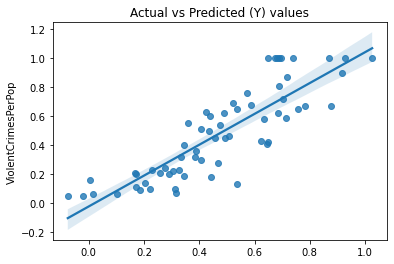

In [13]:
sns.regplot(prediction1,Dep_test)
plt.title('Actual vs Predicted (Y) values')
plt.show()

##### TASK 4

In [ ]:
#Ridge regression

In [14]:
L1=[]
for i in range(-10,11):
    L1.append(10**(i))
error=[]
for i in L1:
    myRidge=Ridge(alpha=i).fit(Indep_train,Dep_train)
    prediction1=myRidge.predict(Indep_test)
    mse=mean_squared_error(prediction1,Dep_test)
    print('Mean Squared Error',i,'is',mse)
    error.append(mse)

Mean Squared Error 1e-10 is 0.04052547786094714
Mean Squared Error 1e-09 is 0.04052549432310551
Mean Squared Error 1e-08 is 0.04052565891034211
Mean Squared Error 1e-07 is 0.04052730133210346
Mean Squared Error 1e-06 is 0.04054338163096423
Mean Squared Error 1e-05 is 0.040672829555406784
Mean Squared Error 0.0001 is 0.04090284436308136
Mean Squared Error 0.001 is 0.03971611535525073
Mean Squared Error 0.01 is 0.03626020126282828
Mean Squared Error 0.1 is 0.031165801983589654
Mean Squared Error 1 is 0.025718141485938595
Mean Squared Error 10 is 0.025797399282234505
Mean Squared Error 100 is 0.03737339006894724
Mean Squared Error 1000 is 0.07540694147274019
Mean Squared Error 10000 is 0.0935711044532255
Mean Squared Error 100000 is 0.09602680971127092
Mean Squared Error 1000000 is 0.09628085494138358
Mean Squared Error 10000000 is 0.09630634693475132
Mean Squared Error 100000000 is 0.09630889701159817
Mean Squared Error 1000000000 is 0.09630915202806077
Mean Squared Error 10000000000 is 

In [15]:
print('Test error values:\n',error)

Test error values:
 [0.04052547786094714, 0.04052549432310551, 0.04052565891034211, 0.04052730133210346, 0.04054338163096423, 0.040672829555406784, 0.04090284436308136, 0.03971611535525073, 0.03626020126282828, 0.031165801983589654, 0.025718141485938595, 0.025797399282234505, 0.03737339006894724, 0.07540694147274019, 0.0935711044532255, 0.09602680971127092, 0.09628085494138358, 0.09630634693475132, 0.09630889701159817, 0.09630915202806077, 0.09630917752979481]


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


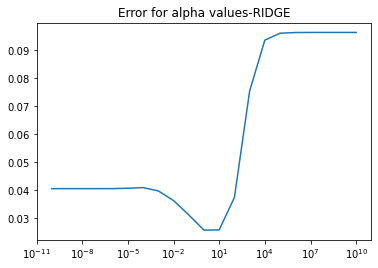

In [16]:
sns.lineplot(L1,error)
plt.xscale('log')
plt.title('Error for alpha values-RIDGE')
plt.show()

##### TASK 5

#### LASSO Regression

In [54]:
myLasso=Lasso(alpha=0.000001).fit(Indep_train,Dep_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7018582187460198, tolerance: 0.0018150105882352944
  model = cd_fast.enet_coordinate_descent(


In [55]:
prediction2=myLasso.predict(Indep_test)
prediction2

array([ 0.22730883,  0.51950781,  0.32361305,  0.40267078,  0.501735  ,
        0.69775531,  0.28613385,  0.52314503,  0.71730868,  0.42463882,
        0.28825668,  0.35472356,  0.60546791,  0.77100616,  0.5596729 ,
        0.74384409,  0.76691744,  0.84243271,  0.32973481,  0.51409614,
        0.8365826 ,  0.50945794,  0.14109131,  0.69126397,  0.67414336,
        0.71461923,  0.83684959,  0.59574956,  0.58614241,  0.17570921,
        0.5412952 ,  0.77272053,  0.88577148,  0.1936611 , -0.05995778,
        0.0941515 ,  0.42960874,  0.57254059,  0.7383968 ,  0.34203261,
        0.32383477,  0.20141638,  0.03921089,  0.32755592,  0.30463601,
        0.82027321,  0.96397515,  0.52451833,  0.90794173,  0.02371714,
       -0.10753846, -0.13718532,  0.66324996,  0.66663748,  1.29890579,
        0.55125273,  0.28390086,  0.5183291 ,  0.59491295,  1.02064237,
        0.11208389,  0.12932929,  0.34464855,  0.11147311])

In [ ]:
#Evaluating model statistically

In [56]:
myLasso=Lasso(alpha=0.000001).fit(Indep_train,Dep_train)
prediction2=myLasso.predict(Indep_test)
print('R square is',myLasso.score(Indep_test,Dep_test))
print('Mean Squared Error is',mean_squared_error(prediction2,Dep_test))
print('RMSE is',math.sqrt(mean_squared_error(Dep_test,prediction2)))
print('Mean Absolute Error is',mean_absolute_error(prediction2,Dep_test))

R square is 0.588519057237864
Mean Squared Error is 0.03872099965289007
RMSE is 0.1967765221079234
Mean Absolute Error is 0.1473398890077937


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7018582187460198, tolerance: 0.0018150105882352944
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#Evaluating model visually


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


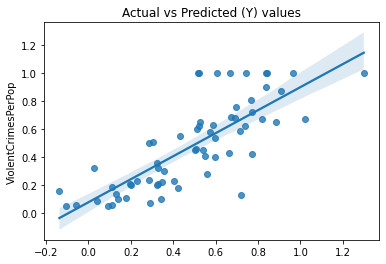

In [57]:
sns.regplot(prediction2,Dep_test)
plt.title('Actual vs Predicted (Y) values')
plt.show()

In [ ]:
#Regularization strength

In [58]:
error1=[]
for i in L1:
    myLasso=Lasso(alpha=i).fit(Indep_train,Dep_train)
    prediction2=myLasso.predict(Indep_test)
    mse=mean_squared_error(prediction2,Dep_test)
    print('Mean Squared Error',i,'is',mse)
    error1.append(mse)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7217796359586999, tolerance: 0.0018150105882352944
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7217622107373882, tolerance: 0.0018150105882352944
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7215879095071545, tolerance: 0.0018150105882352944
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Co

Mean Squared Error 1e-10 is 0.038862164068683425
Mean Squared Error 1e-09 is 0.03886204241914086
Mean Squared Error 1e-08 is 0.038860824839010405
Mean Squared Error 1e-07 is 0.038848679950532705
Mean Squared Error 1e-06 is 0.03872099965289007
Mean Squared Error 1e-05 is 0.037477642725110456
Mean Squared Error 0.0001 is 0.03135553689045883
Mean Squared Error 0.001 is 0.025737786693541726
Mean Squared Error 0.01 is 0.03562179608470977
Mean Squared Error 0.1 is 0.09630918036332178
Mean Squared Error 1 is 0.09630918036332178
Mean Squared Error 10 is 0.09630918036332178
Mean Squared Error 100 is 0.09630918036332178
Mean Squared Error 1000 is 0.09630918036332178
Mean Squared Error 10000 is 0.09630918036332178
Mean Squared Error 100000 is 0.09630918036332178
Mean Squared Error 1000000 is 0.09630918036332178
Mean Squared Error 10000000 is 0.09630918036332178
Mean Squared Error 100000000 is 0.09630918036332178
Mean Squared Error 1000000000 is 0.09630918036332178
Mean Squared Error 10000000000 i

In [59]:
print('Test error values:\n',error1)

Test error values:
 [0.038862164068683425, 0.03886204241914086, 0.038860824839010405, 0.038848679950532705, 0.03872099965289007, 0.037477642725110456, 0.03135553689045883, 0.025737786693541726, 0.03562179608470977, 0.09630918036332178, 0.09630918036332178, 0.09630918036332178, 0.09630918036332178, 0.09630918036332178, 0.09630918036332178, 0.09630918036332178, 0.09630918036332178, 0.09630918036332178, 0.09630918036332178, 0.09630918036332178, 0.09630918036332178]


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


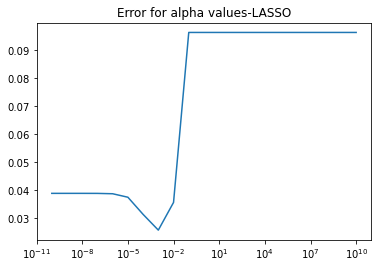

In [60]:
sns.lineplot(L1,error1)
plt.xscale('log')
plt.title('Error for alpha values-LASSO')
plt.show()

In [61]:
#non zero coefficients
List=[0.000001,1,100]
for i in List:
    myLasso=Lasso(alpha=i).fit(Indep_train,Dep_train)
    print('Coefficient for',i,'\n',myLasso.coef_)

Coefficient for 1e-06 
 [-7.09970811e-01  1.20945230e+00 -5.81274717e-02  4.18879002e-01
  4.69398233e-02  1.52693756e-01  1.40716216e-02 -1.50760126e+00
  7.24320480e-01 -2.28135062e-01  1.16144746e+00 -1.60055463e-01
  2.04020084e-01 -3.45059563e-02 -3.02326628e-01 -8.88419745e-01
 -1.48478733e-01  3.48739545e-01  6.78853951e-02  3.18668723e-01
 -1.07011381e+00  8.13083630e-01 -3.15667161e-01  5.21933706e-02
 -1.31935230e-01  2.95445339e-01 -1.43260969e-01 -8.81913166e-01
  4.92447469e-01 -1.95139537e-01 -6.39573211e-01 -2.76705018e-01
  1.73328362e-01  3.85717102e-01 -2.70753526e-01  8.87260077e-02
  5.28459769e-01  7.47853729e-01  1.74186129e-01 -2.54162364e-01
  3.18756288e-01 -9.84208295e-01  2.83170895e-01 -8.62295477e-01
 -9.86594334e-01  4.09713053e-01  2.12281897e-01  3.56045332e-02
 -6.26199631e-04  2.78160275e-01 -7.79696392e-02 -1.38614806e-01
  2.59563010e-01 -7.22521188e-01 -1.87445190e-01  8.96209952e-01
 -2.63073861e-01  8.03529343e-01  6.52437650e-01 -1.77485460e+00
 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7018582187460198, tolerance: 0.0018150105882352944
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#END